## Train & Save Model

https://blog.openmined.org/upgrade-to-federated-learning-in-10-lines/

https://towardsdatascience.com/how-to-train-an-image-classifier-in-pytorch-and-use-it-to-perform-basic-inference-on-single-images-99465a1e9bf5

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import syft as sy
import matplotlib.pyplot as plt
import torch_syft as ts # Helper functions

%matplotlib inline

hook = sy.TorchHook(torch)  
bob = sy.VirtualWorker(hook, id = "bob") 
alice = sy.VirtualWorker(hook, id = "alice")
args = ts.Arguments()
use_cuda = not args.no_cuda and torch.cuda.is_available()
torch.manual_seed(args.seed)
device = torch.device("cuda" if use_cuda else "cpu")
kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}

federated_train_loader = sy.FederatedDataLoader(
    datasets.MNIST('~/workspace/data', train = True, download = True,
                   transform = transforms.Compose([transforms.ToTensor(),
                                                   transforms.Normalize((0.1307,), (0.3081,))]))
    .federate((bob, alice)), batch_size=args.batch_size, shuffle=True, **kwargs)

test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('~/workspace/data', train = False, 
                   transform = transforms.Compose([transforms.ToTensor(),
                                                   transforms.Normalize((0.1307,), (0.3081,))])),
    batch_size = args.test_batch_size, shuffle=True, **kwargs)
    
model = ts.Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=args.lr)

for epoch in range(1, args.epochs + 1):
    ts.train(args, model, device, federated_train_loader, optimizer, epoch)
    ts.test(args, model, device, test_loader)

if (args.save_model):
    torch.save(model.state_dict(), "mnist_cnn.pt") 

/home/gordon/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
W0630 09:19:55.174320 140167981172544 secure_random.py:26] Falling back to insecure randomness since the required custom op could not be found for the installed version of TensorFlow. Fix this by compiling custom ops. Missing file was '/home/gordon/anaconda3/lib/python3.6/site-packages/tf_encrypted/operations/secure_random/secure_random_module_tf_1.14.0.so'
W0630 09:19:55.190243 140167981172544 deprecation_wrapper.py:119] From /home/gordon/anaconda3/lib/python3.6/site-packages/tf_encrypted/session.py:26: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

0it [00:00, ?it/s]

9920512it [00:00, 17220574.30it/s]                             


Extracting /home/gordon/workspace/data/MNIST/raw/train-images-idx3-ubyte.gz


32768it [00:00, 1060174.90it/s]
1654784it [00:00, 12439497.07it/s]                           

Extracting /home/gordon/workspace/data/MNIST/raw/train-labels-idx1-ubyte.gz
Extracting /home/gordon/workspace/data/MNIST/raw/t10k-images-idx3-ubyte.gz



8192it [00:00, 459932.78it/s]


Extracting /home/gordon/workspace/data/MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!
Train Epoch: 1 [0/60032 (0%)]	Loss: 2.305134
Train Epoch: 1 [640/60032 (1%)]	Loss: 2.273475
Train Epoch: 1 [1280/60032 (2%)]	Loss: 2.216174
Train Epoch: 1 [1920/60032 (3%)]	Loss: 2.156802
Train Epoch: 1 [2560/60032 (4%)]	Loss: 2.139428
Train Epoch: 1 [3200/60032 (5%)]	Loss: 2.053080
Train Epoch: 1 [3840/60032 (6%)]	Loss: 1.896611
Train Epoch: 1 [4480/60032 (7%)]	Loss: 1.917295
Train Epoch: 1 [5120/60032 (9%)]	Loss: 1.655166
Train Epoch: 1 [5760/60032 (10%)]	Loss: 1.440409
Train Epoch: 1 [6400/60032 (11%)]	Loss: 1.231397
Train Epoch: 1 [7040/60032 (12%)]	Loss: 0.983658
Train Epoch: 1 [7680/60032 (13%)]	Loss: 0.867280
Train Epoch: 1 [8320/60032 (14%)]	Loss: 0.890855
Train Epoch: 1 [8960/60032 (15%)]	Loss: 0.861959
Train Epoch: 1 [9600/60032 (16%)]	Loss: 0.654403
Train Epoch: 1 [10240/60032 (17%)]	Loss: 0.587101
Train Epoch: 1 [10880/60032 (18%)]	Loss: 0.693248
Train Epoch: 1 [11520/60032 (19%)]

Train Epoch: 2 [42240/60032 (70%)]	Loss: 0.152885
Train Epoch: 2 [42880/60032 (71%)]	Loss: 0.137461
Train Epoch: 2 [43520/60032 (72%)]	Loss: 0.106532
Train Epoch: 2 [44160/60032 (74%)]	Loss: 0.047505
Train Epoch: 2 [44800/60032 (75%)]	Loss: 0.101376
Train Epoch: 2 [45440/60032 (76%)]	Loss: 0.116271
Train Epoch: 2 [46080/60032 (77%)]	Loss: 0.086508
Train Epoch: 2 [46720/60032 (78%)]	Loss: 0.072095
Train Epoch: 2 [47360/60032 (79%)]	Loss: 0.197535
Train Epoch: 2 [48000/60032 (80%)]	Loss: 0.101396
Train Epoch: 2 [48640/60032 (81%)]	Loss: 0.082499
Train Epoch: 2 [49280/60032 (82%)]	Loss: 0.095054
Train Epoch: 2 [49920/60032 (83%)]	Loss: 0.154378
Train Epoch: 2 [50560/60032 (84%)]	Loss: 0.105888
Train Epoch: 2 [51200/60032 (85%)]	Loss: 0.062209
Train Epoch: 2 [51840/60032 (86%)]	Loss: 0.032265
Train Epoch: 2 [52480/60032 (87%)]	Loss: 0.169479
Train Epoch: 2 [53120/60032 (88%)]	Loss: 0.070053
Train Epoch: 2 [53760/60032 (90%)]	Loss: 0.073180
Train Epoch: 2 [54400/60032 (91%)]	Loss: 0.049992


Train Epoch: 4 [26240/60032 (44%)]	Loss: 0.160822
Train Epoch: 4 [26880/60032 (45%)]	Loss: 0.176536
Train Epoch: 4 [27520/60032 (46%)]	Loss: 0.027268
Train Epoch: 4 [28160/60032 (47%)]	Loss: 0.062978
Train Epoch: 4 [28800/60032 (48%)]	Loss: 0.095246
Train Epoch: 4 [29440/60032 (49%)]	Loss: 0.151630
Train Epoch: 4 [30080/60032 (50%)]	Loss: 0.024575
Train Epoch: 4 [30720/60032 (51%)]	Loss: 0.018906
Train Epoch: 4 [31360/60032 (52%)]	Loss: 0.145415
Train Epoch: 4 [32000/60032 (53%)]	Loss: 0.021711
Train Epoch: 4 [32640/60032 (54%)]	Loss: 0.149366
Train Epoch: 4 [33280/60032 (55%)]	Loss: 0.057330
Train Epoch: 4 [33920/60032 (57%)]	Loss: 0.087206
Train Epoch: 4 [34560/60032 (58%)]	Loss: 0.030220
Train Epoch: 4 [35200/60032 (59%)]	Loss: 0.064036
Train Epoch: 4 [35840/60032 (60%)]	Loss: 0.098348
Train Epoch: 4 [36480/60032 (61%)]	Loss: 0.009968
Train Epoch: 4 [37120/60032 (62%)]	Loss: 0.057219
Train Epoch: 4 [37760/60032 (63%)]	Loss: 0.080713
Train Epoch: 4 [38400/60032 (64%)]	Loss: 0.044555


Train Epoch: 6 [10240/60032 (17%)]	Loss: 0.084168
Train Epoch: 6 [10880/60032 (18%)]	Loss: 0.014655
Train Epoch: 6 [11520/60032 (19%)]	Loss: 0.086800
Train Epoch: 6 [12160/60032 (20%)]	Loss: 0.038284
Train Epoch: 6 [12800/60032 (21%)]	Loss: 0.039181
Train Epoch: 6 [13440/60032 (22%)]	Loss: 0.037182
Train Epoch: 6 [14080/60032 (23%)]	Loss: 0.032302
Train Epoch: 6 [14720/60032 (25%)]	Loss: 0.034672
Train Epoch: 6 [15360/60032 (26%)]	Loss: 0.097992
Train Epoch: 6 [16000/60032 (27%)]	Loss: 0.064300
Train Epoch: 6 [16640/60032 (28%)]	Loss: 0.074520
Train Epoch: 6 [17280/60032 (29%)]	Loss: 0.052494
Train Epoch: 6 [17920/60032 (30%)]	Loss: 0.006776
Train Epoch: 6 [18560/60032 (31%)]	Loss: 0.073455
Train Epoch: 6 [19200/60032 (32%)]	Loss: 0.043032
Train Epoch: 6 [19840/60032 (33%)]	Loss: 0.036362
Train Epoch: 6 [20480/60032 (34%)]	Loss: 0.048331
Train Epoch: 6 [21120/60032 (35%)]	Loss: 0.073197
Train Epoch: 6 [21760/60032 (36%)]	Loss: 0.084559
Train Epoch: 6 [22400/60032 (37%)]	Loss: 0.114878


Train Epoch: 7 [55040/60032 (92%)]	Loss: 0.044011
Train Epoch: 7 [55680/60032 (93%)]	Loss: 0.021235
Train Epoch: 7 [56320/60032 (94%)]	Loss: 0.083562
Train Epoch: 7 [56960/60032 (95%)]	Loss: 0.075774
Train Epoch: 7 [57600/60032 (96%)]	Loss: 0.177839
Train Epoch: 7 [58240/60032 (97%)]	Loss: 0.031464
Train Epoch: 7 [58880/60032 (98%)]	Loss: 0.072000
Train Epoch: 7 [59520/60032 (99%)]	Loss: 0.026675

Test set: Average loss: 0.0444, Accuracy: 9861/10000 (99%)

Train Epoch: 8 [0/60032 (0%)]	Loss: 0.057219
Train Epoch: 8 [640/60032 (1%)]	Loss: 0.003078
Train Epoch: 8 [1280/60032 (2%)]	Loss: 0.008518
Train Epoch: 8 [1920/60032 (3%)]	Loss: 0.036687
Train Epoch: 8 [2560/60032 (4%)]	Loss: 0.012121
Train Epoch: 8 [3200/60032 (5%)]	Loss: 0.095478
Train Epoch: 8 [3840/60032 (6%)]	Loss: 0.075754
Train Epoch: 8 [4480/60032 (7%)]	Loss: 0.036107
Train Epoch: 8 [5120/60032 (9%)]	Loss: 0.064524
Train Epoch: 8 [5760/60032 (10%)]	Loss: 0.078499
Train Epoch: 8 [6400/60032 (11%)]	Loss: 0.019512
Train Epoch: 

Train Epoch: 9 [39040/60032 (65%)]	Loss: 0.088517
Train Epoch: 9 [39680/60032 (66%)]	Loss: 0.005169
Train Epoch: 9 [40320/60032 (67%)]	Loss: 0.018577
Train Epoch: 9 [40960/60032 (68%)]	Loss: 0.021493
Train Epoch: 9 [41600/60032 (69%)]	Loss: 0.007582
Train Epoch: 9 [42240/60032 (70%)]	Loss: 0.031127
Train Epoch: 9 [42880/60032 (71%)]	Loss: 0.022230
Train Epoch: 9 [43520/60032 (72%)]	Loss: 0.035726
Train Epoch: 9 [44160/60032 (74%)]	Loss: 0.004209
Train Epoch: 9 [44800/60032 (75%)]	Loss: 0.005635
Train Epoch: 9 [45440/60032 (76%)]	Loss: 0.030155
Train Epoch: 9 [46080/60032 (77%)]	Loss: 0.047122
Train Epoch: 9 [46720/60032 (78%)]	Loss: 0.010066
Train Epoch: 9 [47360/60032 (79%)]	Loss: 0.152536
Train Epoch: 9 [48000/60032 (80%)]	Loss: 0.013908
Train Epoch: 9 [48640/60032 (81%)]	Loss: 0.027193
Train Epoch: 9 [49280/60032 (82%)]	Loss: 0.034739
Train Epoch: 9 [49920/60032 (83%)]	Loss: 0.006287
Train Epoch: 9 [50560/60032 (84%)]	Loss: 0.011080
Train Epoch: 9 [51200/60032 (85%)]	Loss: 0.015259


## Load Model And Predict

In [5]:
model_ld = Net().to(device)
model_ld.load_state_dict(torch.load("../models/mnist_cnn.pt"))
model_ld.eval()

Net(
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(20, 50, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=800, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)

3


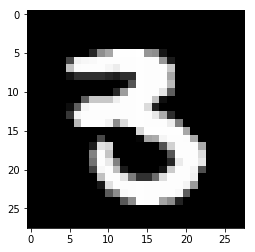

In [43]:
dataiter = iter(test_loader)
images, labels = dataiter.next()
y_pred = model_ld(images)

print(y_pred[0].data.cpu().numpy().argmax(axis = 0))
plt.imshow(images[0].numpy().squeeze(), cmap='Greys_r');